### Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV


### Load data

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Data contains 614 rows and 13 columns

### Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data contains 614 entries. There are eight object type one integer type and four float type datas.

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Some variables have skewness.

In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

This shows the number of unique element for each variable.

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History have null values.

In [8]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


There is multicollinearity. Therefore LoanAmount has to be removed.

In [9]:
df1 = df.drop(columns = ['Loan_ID'], inplace = False)

In [10]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#### Handling null values

In [11]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df1[["Dependents","Gender","Married","Education","Self_Employed","Credit_History"]]=si.fit_transform(df1[["Dependents","Gender","Married","Education","Self_Employed","Credit_History"]])

In [12]:
si=SimpleImputer(missing_values=np.nan,strategy="median")
df1[["LoanAmount","Loan_Amount_Term"]]=si.fit_transform(df1[["LoanAmount","Loan_Amount_Term"]])

In [13]:
df1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

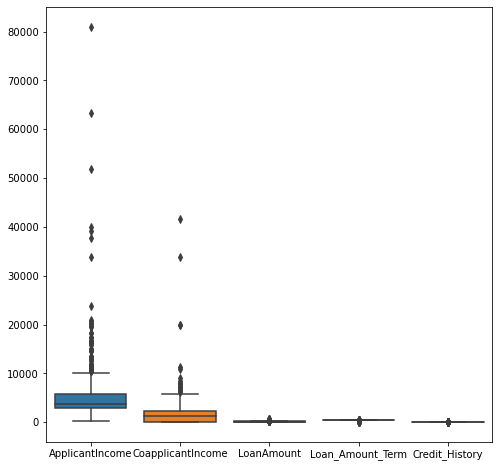

In [14]:
plt.figure(figsize=(8,8))
sns.boxplot(data=df1)
plt.show()

<AxesSubplot:xlabel='ApplicantIncome'>

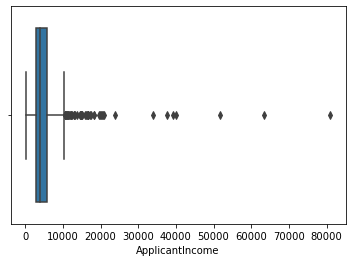

In [15]:
sns.boxplot(x=df1['ApplicantIncome'])

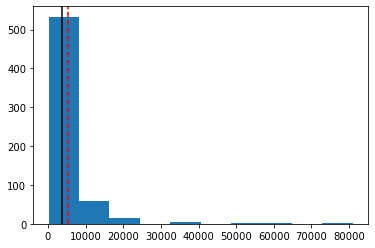

In [16]:
hist1 = plt.hist(x=df1['ApplicantIncome'])
plt.axvline(df1['ApplicantIncome'].mean(), color = 'red', linestyle='--')
plt.axvline(df1['ApplicantIncome'].median(), color = 'black', linestyle='-')

* Positiveky skewed distribution
* Outliers on right hand side, but expected with Income
* Mean and Median close enough

<AxesSubplot:xlabel='CoapplicantIncome'>

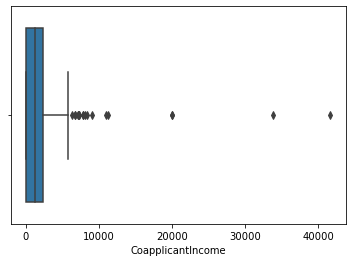

In [17]:
sns.boxplot(x=df1['CoapplicantIncome'])

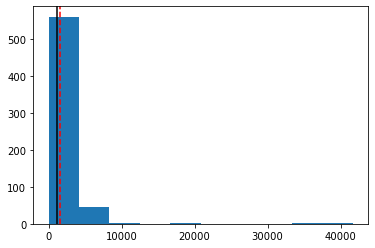

In [18]:
hist1 = plt.hist(x=df1['CoapplicantIncome'])
plt.axvline(df1['CoapplicantIncome'].mean(), color = 'red', linestyle='--')
plt.axvline(df1['CoapplicantIncome'].median(), color = 'black', linestyle='-')

* Positiveky skewed distribution
* Outliers on right hand side, but expected with Income
* Mean and Median close enough

<AxesSubplot:xlabel='LoanAmount'>

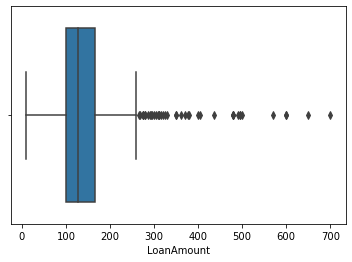

In [19]:
sns.boxplot(x=df1['LoanAmount'])

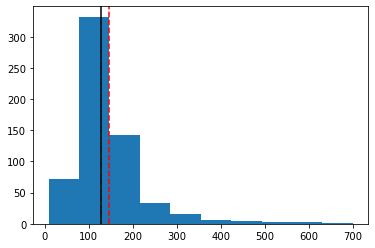

In [20]:
hist1 = plt.hist(x=df1['LoanAmount'])
plt.axvline(df1['LoanAmount'].mean(), color = 'red', linestyle='--')
plt.axvline(df1['LoanAmount'].median(), color = 'black', linestyle='-')

* Slightly positiveky skewed distribution
* Outliers on right hand side, which may need to be treated
* Mean and Median close enough

In [21]:
df_cat = df1.select_dtypes(["object"])

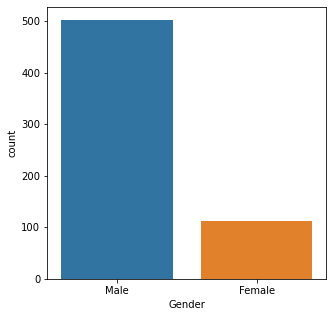

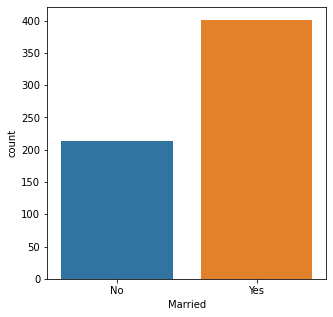

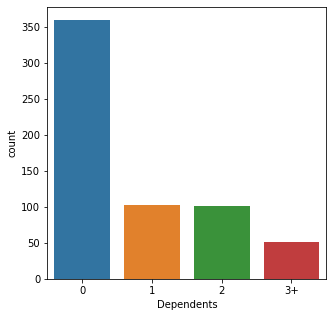

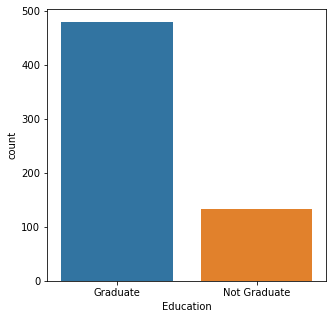

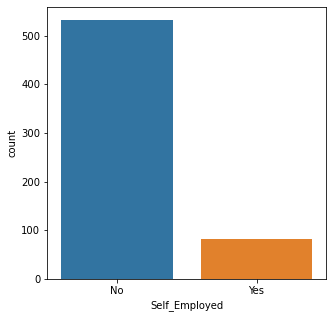

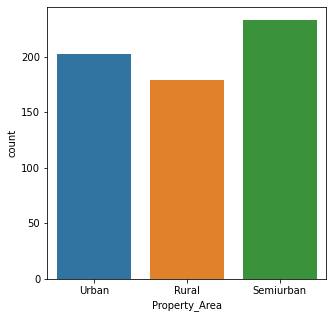

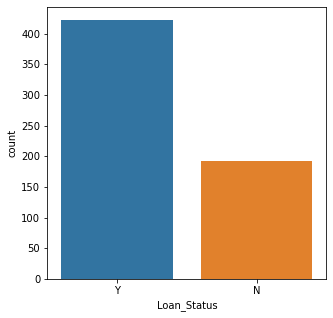

In [22]:
for col in df_cat:
    plt.figure(figsize=(5,5))
    sns.countplot(data=df_cat,x=col)
    plt.show()

* Majority of population is Male
* More than 50% of population is Married
* Majority population have 0 Dependents
* Almost 80% of population is Graduate
* Majority of population resides in Urban / Semi-Urban areas

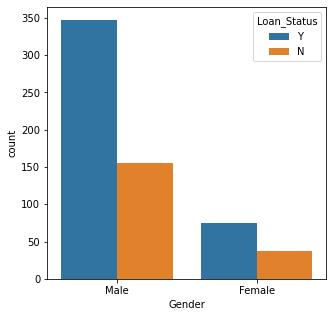

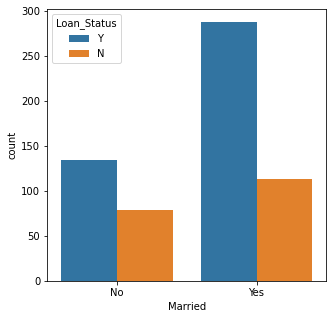

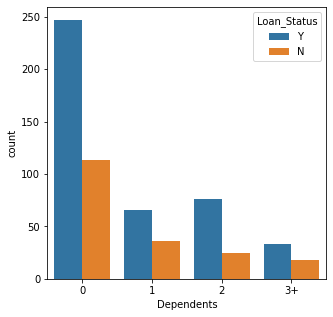

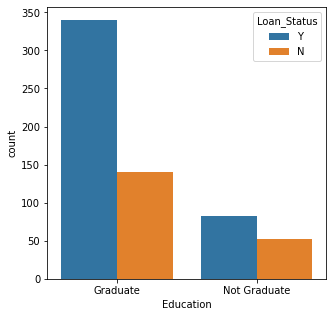

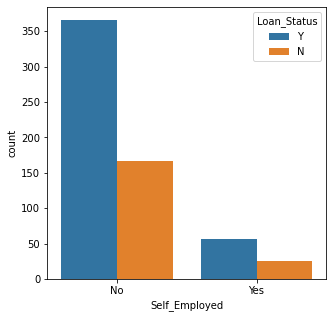

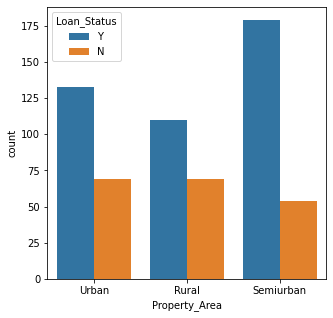

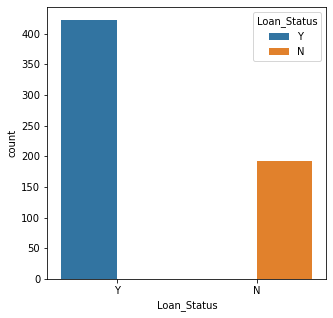

In [23]:
for col in df_cat:
    plt.figure(figsize=(5,5))
    sns.countplot(data=df_cat,x=col,hue="Loan_Status")
    plt.show()

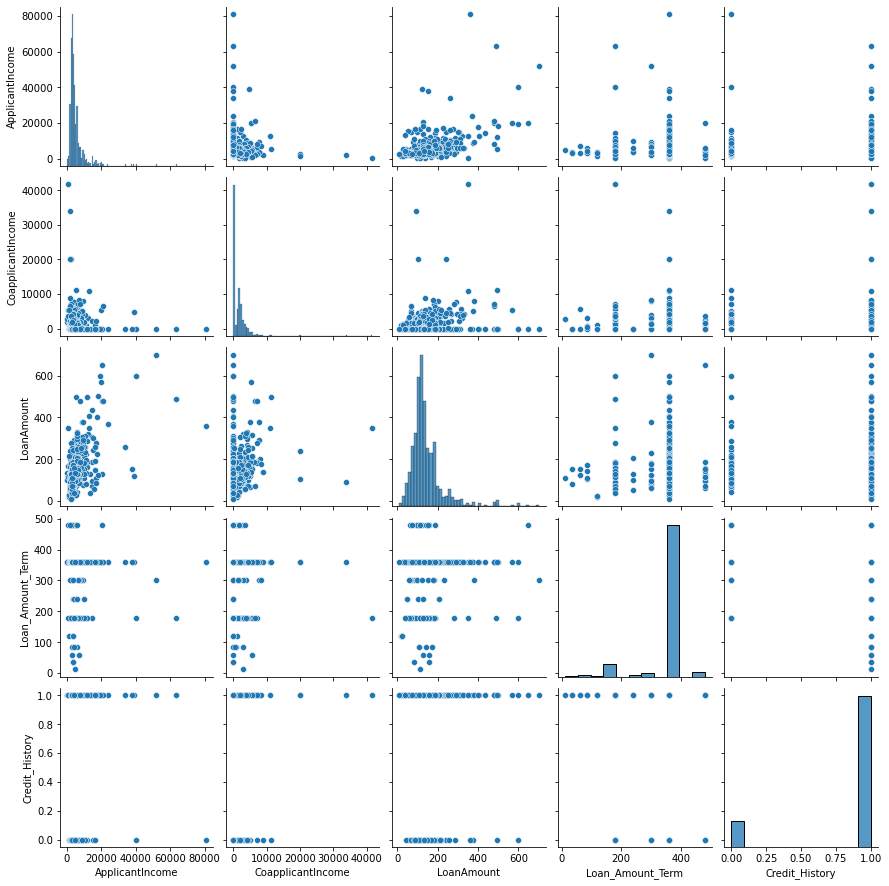

In [24]:
sns.pairplot(df1)

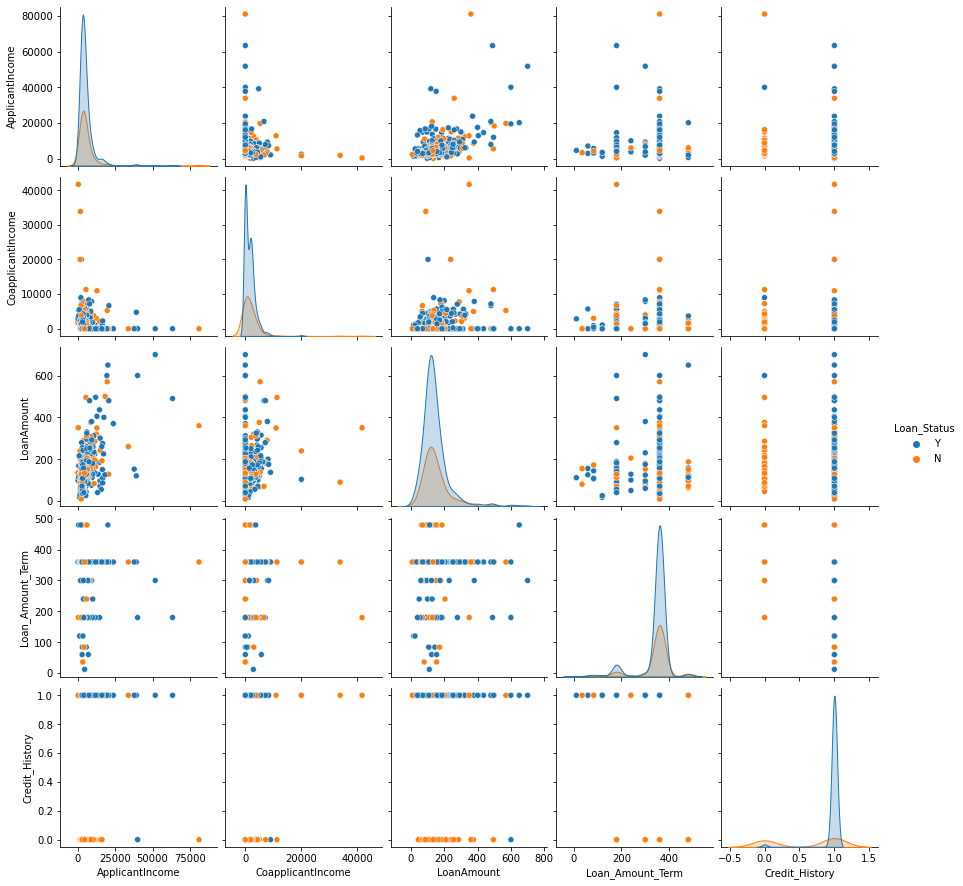

In [25]:
sns.pairplot(df1, diag_kind= 'kde', hue = 'Loan_Status')

In [26]:
df1.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


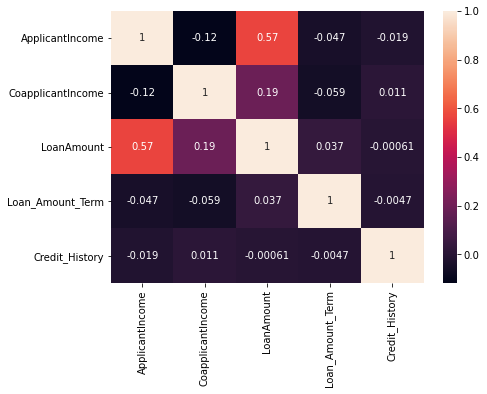

In [27]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(), annot=True)
plt.show()

In [28]:
df1.drop(columns = ['LoanAmount'], inplace = True)

In [29]:
catcol=df1.select_dtypes(object).columns
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df1[catcol]=oe.fit_transform(df1[catcol])

In [30]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,360.0,1.0,2.0,1.0


### Balancing data

In [31]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
import imblearn

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
ros = RandomOverSampler(random_state=0)

In [35]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [36]:
x, y = ros.fit_resample(x, y)

In [37]:
x.shape

(844, 10)

In [38]:
y.shape

(844,)

In [39]:
y.value_counts()

0.0    422
1.0    422
Name: Loan_Status, dtype: int64

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
xtrain.shape

(590, 10)

In [42]:
xtest.shape

(254, 10)

In [43]:
ytrain.shape

(590,)

In [44]:
ytest.shape

(254,)

### Developing Models

In [45]:
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain, ytrain)
    test = model.score(xtest, ytest)
    
    print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
    print(classification_report(ytest, ypred))
    return model

In [46]:
mymodel(RandomForestClassifier())

Training Accuracy : 1.0
Testing Accuracy : 0.8464566929133859


              precision    recall  f1-score   support

         0.0       0.86      0.85      0.86       136
         1.0       0.83      0.84      0.84       118

    accuracy                           0.85       254
   macro avg       0.85      0.85      0.85       254
weighted avg       0.85      0.85      0.85       254



RandomForestClassifier()

In [47]:
mymodel(BaggingClassifier(RandomForestClassifier()))

Training Accuracy : 0.9864406779661017
Testing Accuracy : 0.8464566929133859


              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       136
         1.0       0.81      0.87      0.84       118

    accuracy                           0.85       254
   macro avg       0.85      0.85      0.85       254
weighted avg       0.85      0.85      0.85       254



BaggingClassifier(estimator=RandomForestClassifier())

In [48]:
mymodel(LogisticRegression())

Training Accuracy : 0.7271186440677966
Testing Accuracy : 0.6811023622047244


              precision    recall  f1-score   support

         0.0       0.86      0.49      0.62       136
         1.0       0.60      0.91      0.73       118

    accuracy                           0.68       254
   macro avg       0.73      0.70      0.67       254
weighted avg       0.74      0.68      0.67       254



LogisticRegression()

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
mymodel(KNeighborsClassifier())

Training Accuracy : 0.747457627118644
Testing Accuracy : 0.6338582677165354


              precision    recall  f1-score   support

         0.0       0.66      0.65      0.66       136
         1.0       0.61      0.61      0.61       118

    accuracy                           0.63       254
   macro avg       0.63      0.63      0.63       254
weighted avg       0.63      0.63      0.63       254



KNeighborsClassifier()

In [51]:
mymodel(BaggingClassifier(KNeighborsClassifier()))

Training Accuracy : 0.7728813559322034
Testing Accuracy : 0.6496062992125984


              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68       136
         1.0       0.63      0.61      0.62       118

    accuracy                           0.65       254
   macro avg       0.65      0.65      0.65       254
weighted avg       0.65      0.65      0.65       254



BaggingClassifier(estimator=KNeighborsClassifier())

In [52]:
mymodel(AdaBoostClassifier())

Training Accuracy : 0.7915254237288135
Testing Accuracy : 0.7362204724409449


              precision    recall  f1-score   support

         0.0       0.89      0.58      0.70       136
         1.0       0.65      0.92      0.76       118

    accuracy                           0.74       254
   macro avg       0.77      0.75      0.73       254
weighted avg       0.78      0.74      0.73       254



AdaBoostClassifier()

In [53]:
mymodel(XGBClassifier())

Training Accuracy : 0.9983050847457627
Testing Accuracy : 0.84251968503937


              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86       136
         1.0       0.84      0.81      0.83       118

    accuracy                           0.84       254
   macro avg       0.84      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Choosing best model

In [54]:
from sklearn.model_selection import KFold, cross_val_score

clf = RandomForestClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.8816568  0.82248521 0.85798817 0.89940828 1.        ]
Average CV Score:  0.8923076923076924
Number of CV Scores used in Average:  5


In [55]:
model_1 = RandomForestClassifier(random_state=42)

model_1.fit(xtrain, ytrain)
ypred = model_1.predict(xtest)

train = model_1.score(xtrain, ytrain)
test = model_1.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
print(classification_report(ytest, ypred))


Training Accuracy : 1.0
Testing Accuracy : 0.8307086614173228


              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       136
         1.0       0.83      0.81      0.82       118

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



model 1 AUC score: 0.8290129611166501


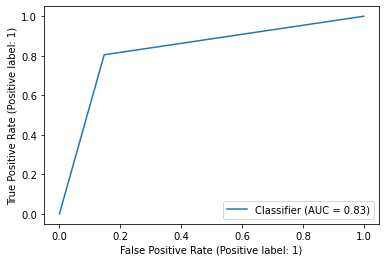

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, ypred)
print(f'model 1 AUC score: {roc_auc_score(ytest, ypred)}')

In [57]:

from sklearn.model_selection import KFold, cross_val_score

clf = XGBClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.85207101 0.82248521 0.84023669 0.9112426  0.98809524]
Average CV Score:  0.8828261482107636
Number of CV Scores used in Average:  5


In [58]:
model_2 = XGBClassifier(random_state=42)

model_2.fit(xtrain, ytrain)
ypred = model_2.predict(xtest)

train = model_2.score(xtrain, ytrain)
test = model_2.score(xtest, ytest)

print(f"Training Accuracy : {train}\nTesting Accuracy : {test}\n\n")
print(classification_report(ytest, ypred))


Training Accuracy : 0.9983050847457627
Testing Accuracy : 0.84251968503937


              precision    recall  f1-score   support

         0.0       0.84      0.87      0.86       136
         1.0       0.84      0.81      0.83       118

    accuracy                           0.84       254
   macro avg       0.84      0.84      0.84       254
weighted avg       0.84      0.84      0.84       254



model 1 AUC score: 0.8406031904287139


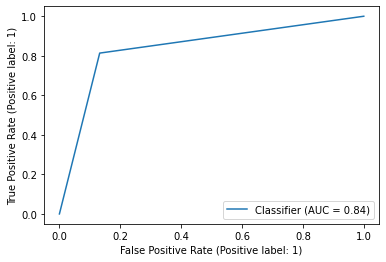

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, ypred)
print(f'model 1 AUC score: {roc_auc_score(ytest, ypred)}')

In [60]:
ypred_RF = model_2.predict(xtest)
y_score_RF = model_2.predict_proba(xtest)[:,1]

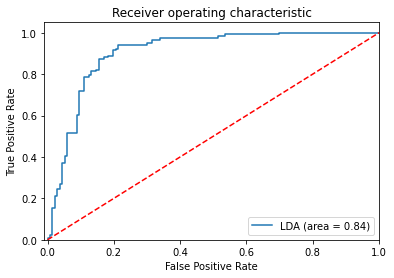

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_2_roc_auc = roc_auc_score(ytest, model_2.predict(xtest))
fpr, tpr, thresholds = roc_curve(ytest, model_2.predict_proba(xtest)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LDA (area = %0.2f)' % model_2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Loading data for prediction

In [62]:
df_test = pd.read_csv("loan-test (2).csv")

In [63]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [64]:
df_test.drop(columns = ['Loan_ID','LoanAmount'], inplace = True)

In [65]:
df_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,360.0,1.0,Urban


In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   Loan_Amount_Term   361 non-null    float64
 8   Credit_History     338 non-null    float64
 9   Property_Area      367 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 28.8+ KB


In [67]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df_test[["Dependents","Gender","Self_Employed",]]=si.fit_transform(df_test[["Dependents","Gender","Self_Employed"]])

si=SimpleImputer(missing_values=np.nan,strategy="median")
df_test[["Loan_Amount_Term","Credit_History"]]=si.fit_transform(df_test[["Loan_Amount_Term","Credit_History"]])

In [68]:
df_test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [69]:
xtest

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area
493,0.0,0.0,0.0,1.0,1.0,17263,0.0,360.0,1.0,1.0
215,1.0,1.0,3.0,1.0,0.0,3850,983.0,360.0,1.0,1.0
622,0.0,0.0,0.0,0.0,0.0,3418,0.0,360.0,1.0,0.0
737,0.0,0.0,1.0,0.0,0.0,2600,0.0,360.0,1.0,2.0
63,1.0,1.0,1.0,0.0,0.0,4945,0.0,360.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
576,1.0,1.0,0.0,0.0,0.0,3087,2210.0,360.0,0.0,1.0
235,1.0,1.0,1.0,0.0,0.0,5500,1260.0,360.0,1.0,0.0
280,1.0,0.0,1.0,1.0,1.0,4053,2426.0,360.0,0.0,2.0
73,1.0,1.0,3.0,1.0,0.0,4755,0.0,360.0,0.0,1.0


In [70]:
catcol=df_test.select_dtypes(object).columns
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df_test[catcol]=oe.fit_transform(df_test[catcol])

In [71]:
df_pred = model_2.predict(df_test)

In [72]:
df_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,

In [73]:
df_result = pd.DataFrame(df_pred, columns = ['Loan_Status'])

In [74]:
df_result

,Loan_Status
0,0
1,1
2,1
3,1
4,1
...,...
362,1
363,1
364,1
365,0


In [75]:
df_final = pd.concat([df_test, df_result], axis=1)

### Predicted data

In [76]:
df_final

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0.0,0.0,0.0,5720,0,360.0,1.0,2.0,0
1,1.0,1.0,1.0,0.0,0.0,3076,1500,360.0,1.0,2.0,1
2,1.0,1.0,2.0,0.0,0.0,5000,1800,360.0,1.0,2.0,1
3,1.0,1.0,2.0,0.0,0.0,2340,2546,360.0,1.0,2.0,1
4,1.0,0.0,0.0,1.0,0.0,3276,0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1.0,3.0,1.0,1.0,4009,1777,360.0,1.0,2.0,1
363,1.0,1.0,0.0,0.0,0.0,4158,709,360.0,1.0,2.0,1
364,1.0,0.0,0.0,0.0,0.0,3250,1993,360.0,1.0,1.0,1
365,1.0,1.0,0.0,0.0,0.0,5000,2393,360.0,1.0,0.0,0
